In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('GOLD.csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
# we can deduce that 'Pred' column has 101 null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
# instantiating linear regression two times as lr1, lr2
# lr1 ---> 'Pred' column
# lr2 ---> 'new' column
lr1 = LinearRegression()
lr2 = LinearRegression()

In [7]:
# converting the data type of the price column
df.columns
df['Price'] = df['Price'].astype(np.int64)

In [8]:
# splitting the data into training and testing data
# testing data is, all the rows where the 'Pred' column is Nan
# training data is, all the rows where the 'Pred' column is not Nan
df_test = df[df['Pred'].isnull()]
df_train = df[df['Pred'].notnull()]

In [9]:
# converting the 'Pred' column data type
df_train['Pred'] = df_train['Pred'].astype(np.int64)

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# training variables are 'Price', 'Open', 'High', 'Low'
# training labels are two different values ---> 'Pred' and 'new'
X_train = df_train[['Price', 'Open', 'High', 'Low']]
y_train_pred = df_train['Pred']
y_train_new = df_train['new']

In [11]:
# training for two data labels
lr1.fit(X_train,y_train_pred)
lr2.fit(X_train,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# coefficients
print(lr1.coef_)

[ 2.  3. -1. -4.]


In [13]:
print(lr2.coef_)

[ 1.01202641 -1.00094252  1.00492221 -1.01604305]


In [14]:
# intercept 
print(lr1.intercept_)

2.6432189770275727e-11


In [15]:
print(lr2.intercept_)

-0.21616304412336262


In [16]:
cdf1 = pd.DataFrame(lr1.coef_, X_train.columns, columns = ['Coeff_pred'])
cdf1

,Coeff_pred
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [17]:
cdf2 = pd.DataFrame(lr2.coef_, X_train.columns, columns = ['Coeff_new'])
cdf2

,Coeff_new
Price,1.012026
Open,-1.000943
High,1.004922
Low,-1.016043


In [18]:
# testing on the trained data set
X_test = df_test[['Price', 'Open', 'High', 'Low']]
y_test_new = df_test['new']

In [19]:
# testing on 'new' and 'Pred' column
# but we don't have 'Pred' column to verify our output as all the values are 'Nan'
predictions_pred = lr1.predict(X_test)
predictions_new = lr2.predict(X_test)

In [20]:
df_test.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976


In [21]:
# creating a dataframe from both the predicted values
# Predicted_new_values and Predicted_pred values
df_pred = pd.DataFrame(predictions_pred, columns = ['Predicted_pred values'])
df_pred['Predicted_new_values'] = predictions_new
df_pred.head()

,Predicted_pred values,Predicted_new_values
0,852.0,195.871760
1,422.0,43.810450
2,530.0,127.645552
3,144.0,126.848503
4,415.0,373.255871


In [22]:
# creating a new column with the 'Predicted_new_values'
# we used '.values' because the index values were different and would have created an error
# with '.values' we replaced the values in our data frame with another coulmn of the data frame keeping index values in mind
df_test['Predicted_new_values'] = df_pred['Predicted_new_values'].values
# replacing the 'Nan' values by the predicted 'new' values (replacing the column from a different data frame)
df_test['Pred'] = df_pred['Predicted_pred values'].values
df_test

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,Predicted_new_values
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493,195.871760
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664,43.810450
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233,127.645552
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539,126.848503
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976,373.255871
...,...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322,247.562017
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158,51.878875
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305,113.004010
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693,48.208741


In [23]:
# we created a new data frame where the combining both the data frame and obtaining exactly the initial data frame except:
# 'Nan' values in 'Pred' column are replaced by the predicted values
# 'Predicted_new_values' will return 'Nan' for the first 411 columns because we did'nt predict those values so not defined
y = pd.concat([df_train, df_test])
y

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Change %,Date,High,Low,Open,Pred,Predicted_new_values,Price,Vol.,new
0,-1.79%,"May 04, 2017",28482,28025,28400,738.0,NaN,28060,0.08K,117.570740
1,0.44%,"May 05, 2017",28382,28135,28136,-146.0,NaN,28184,0.06K,295.430176
2,-0.23%,"May 08, 2017",28255,28097,28145,30.0,NaN,28119,7.85K,132.123714
3,-0.49%,"May 09, 2017",28192,27947,28125,357.0,NaN,27981,10.10K,101.298064
4,0.09%,"May 10, 2017",28146,27981,28060,124.0,NaN,28007,9.28K,112.153318
...,...,...,...,...,...,...,...,...,...,...
507,0.08%,"Apr 26, 2019",31934,31705,31851,535.0,247.562017,31868,9.67K,247.177322
508,-0.76%,"Apr 30, 2019",31824,31597,31800,438.0,51.878875,31625,6.44K,52.201158
509,-0.20%,"May 01, 2019",31657,31503,31604,269.0,113.004010,31563,1.55K,113.293305
510,-1.14%,"May 02, 2019",31425,31160,31420,601.0,48.208741,31203,0.48K,48.365693


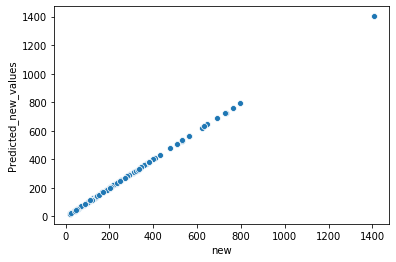

In [24]:
# the scatter plot looks like a staright line proving our predictions were accurate
# the scatter plot is b/w 'new' and 'Predicted_new_values'
sns.scatterplot('new','Predicted_new_values', data = df_test)

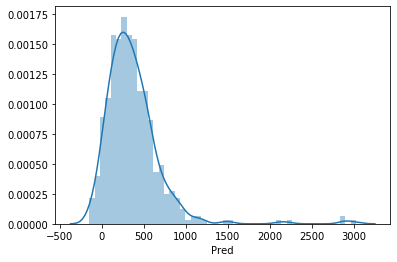

In [25]:
sns.distplot(y['Pred'], bins = 50)

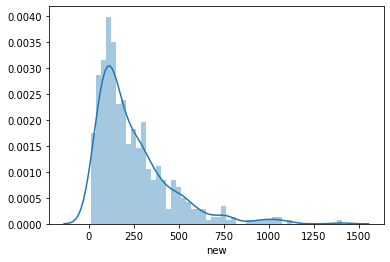

In [26]:
sns.distplot(y['new'],bins = 50)

C:\Users\risha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\risha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


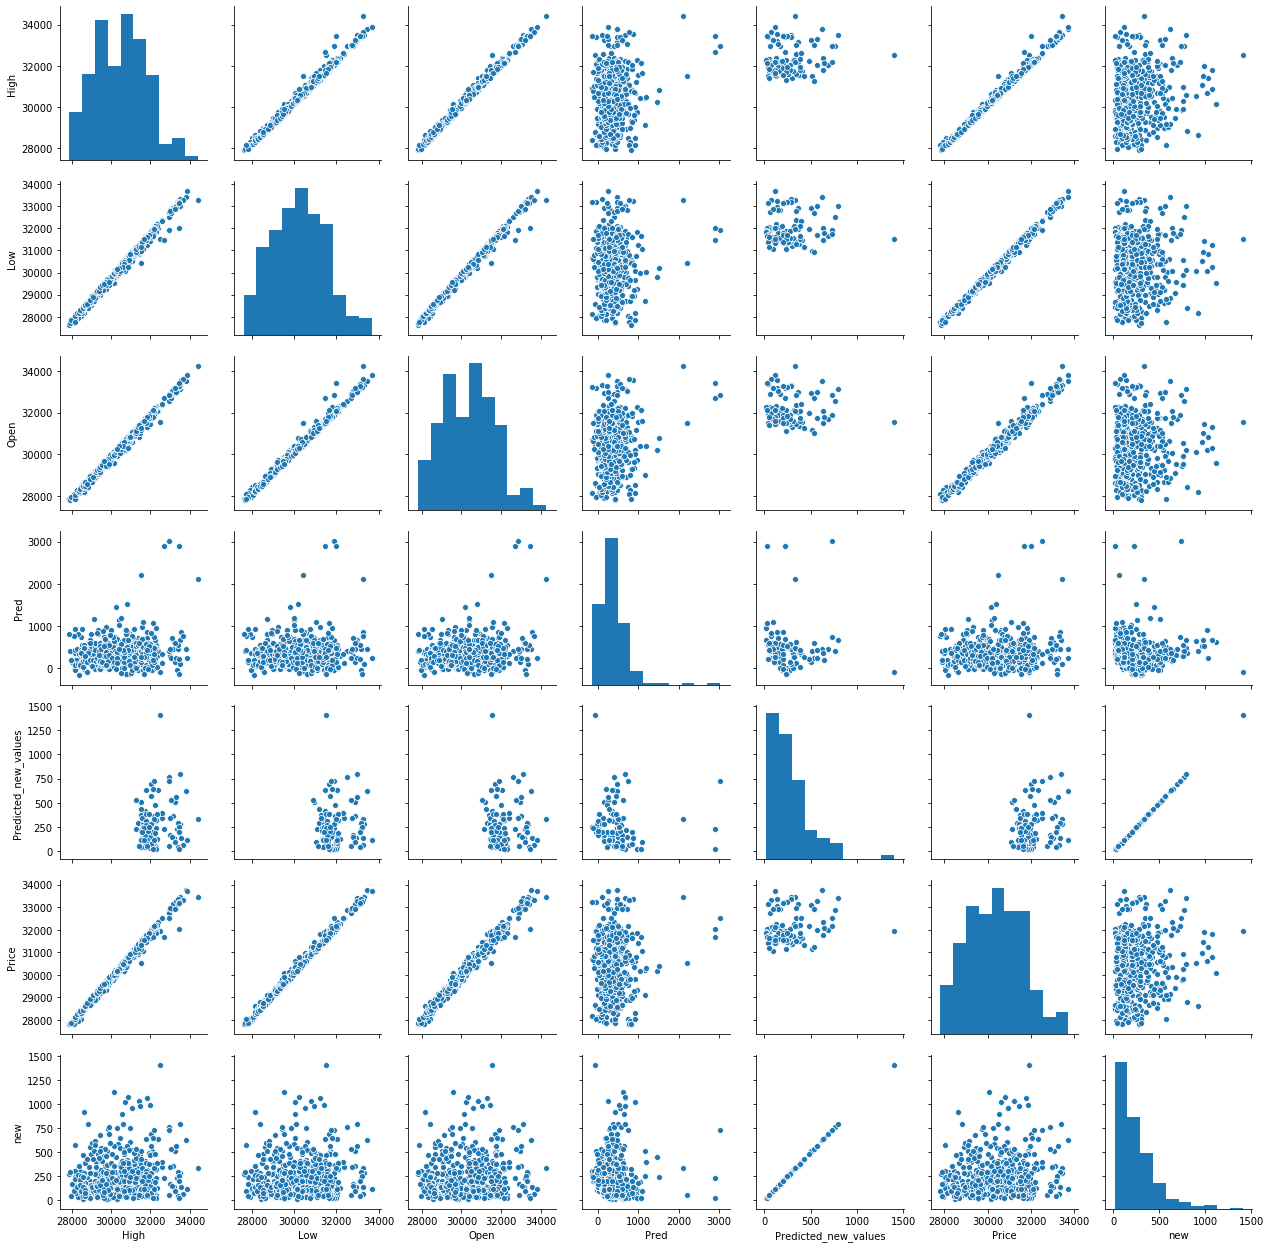

In [27]:
sns.pairplot(y)

## As we can see from the graph, the distplot of 'new' column is multimodal normal distribution therefore it is a polynomial function whereas the distplot of 'Pred' column is unimodal normal distribution therefore it is linear function.
## Also from the scatter plot, comparing 'new' vs high/low/open/price with 'Pred' vs high/low/open/price we can see that the 'Pred' relation with OHLC is more linear and 'new' relation is more dispersed and less linear.


In [28]:
df1 = pd.read_csv('DHFL.csv')

In [29]:
df2 = pd.read_csv('Nifty50.csv')

In [30]:
df1.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

In [31]:
# converting the 'Date' column to datetime64 data type
# calculating daily percentage change
# extracting month and year from 'Date'

df1['Date'] = df1['Date'].astype('datetime64')
df1['Year'], df1['Month'] = df1['Date'].dt.year, df1['Date'].dt.month
df1['Day_Perc_Change'] = df1['Close Price'].pct_change()
df1['Day_Perc_Change'] = df1['Day_Perc_Change'].fillna(0)

df2['Date'] = df2['Date'].astype('datetime64')
df2['Year'], df2['Month'] = df2['Date'].dt.year, df2['Date'].dt.month
df2['Day_Perc_Change'] = df2['Close'].pct_change()
df2['Day_Perc_Change'] = df2['Day_Perc_Change'].fillna(0)

In [32]:
df1_90 = df1.head(90)
df2_90 = df2.head(90)
df1_90.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change
0,DHFL,EQ,2017-05-15,426.65,429.5,434.4,427.05,431.0,431.4,430.94,1160661,500175906.3,15111,295581,25.47,2017,5,0.000000
1,DHFL,N6,2017-05-15,1007.25,1009.9,1009.9,1009.90,1009.9,1009.9,1009.90,50,50495.0,1,50,100.00,2017,5,1.340983
2,DHFL,N8,2017-05-15,1055.00,1055.2,1055.2,1055.20,1055.2,1055.2,1055.20,48,50649.6,2,48,100.00,2017,5,0.044856
3,DHFL,NaN,2017-05-15,1070.00,1070.0,1070.0,1070.00,1070.0,1070.0,1070.00,1,1070.0,1,1,100.00,2017,5,0.014026
4,DHFL,NB,2017-05-15,1040.00,1050.0,1050.0,1050.00,1050.0,1050.0,1050.00,6,6300.0,1,6,100.00,2017,5,-0.018692


In [33]:
# this is a stats model library 
# used for calculating OLS (ordinary least square regression), alpha & beta values
import statsmodels.api as sm

In [34]:
# filtering data for top 90 days (3 months) 
X = df2_90['Day_Perc_Change'].values
y = df1_90['Day_Perc_Change'].values

In [35]:
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
# Hence, we use thecommand 'add_constant' so that it also fits an intercept
X = sm.add_constant(X)

In [36]:
# instantiating OLS with reg_ols
# training the data with '.fit()'
reg_ols = sm.OLS(y,X)
prediction = reg_ols.fit()
print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.211
Date:                Sun, 28 Jun 2020   Prob (F-statistic):              0.274
Time:                        17:00:38   Log-Likelihood:                -74.700
No. Observations:                  90   AIC:                             153.4
Df Residuals:                      88   BIC:                             158.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1157      0.060      1.935      0.0

In [37]:
# prediction.params fuction has two values alpha and beta
# alpha is at location 0
# beta is at location 1
print('Daily beta: ', prediction.params[1])

Daily beta:  12.04263011442461


In [38]:
# creating a data frame of percentage change values for plotting
df_c = pd.DataFrame(df2_90['Day_Perc_Change'])
df_c.rename(columns = {'Day_Perc_Change': 'Perc_change_Nifty'}, inplace = True)
df_c['Perc_change_DHFL'] = df1_90['Day_Perc_Change']
df_c

,Perc_change_Nifty,Perc_change_DHFL
0,0.000000,0.000000
1,0.007078,1.340983
2,0.001419,0.044856
3,-0.010109,0.014026
4,-0.000164,-0.018692
...,...,...
85,0.000724,0.003624
86,-0.000119,0.005043
87,0.006713,-0.613422
88,-0.000547,1.433580


Text(0, 0.5, 'DHFL')

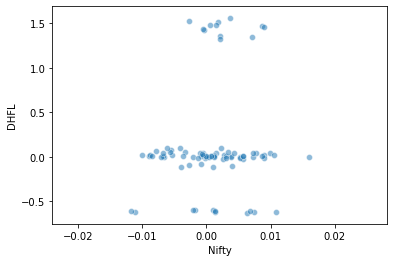

In [39]:
# we added a constant variable before training, so we need to remove that variable for plotting
X = X[:,1]
sns.scatterplot(x = 'Perc_change_Nifty',y = 'Perc_change_DHFL', data = df_c, alpha = 0.5)
plt.xlabel('Nifty')
plt.ylabel('DHFL')

In [40]:
# we are grouping the data frame by months and years coz we need to find beta values for the whole month
df1_m = df1.groupby(['Year','Month']).sum()
df2_m = df2.groupby(['Year','Month']).sum()

In [41]:
X1 = df2_m['Day_Perc_Change'].values
y1 = df1_m['Day_Perc_Change'].values

In [42]:
X1 = sm.add_constant(X1)

In [43]:
reg_ols = sm.OLS(y1,X1)
prediction = reg_ols.fit()
print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.02639
Date:                Sun, 28 Jun 2020   Prob (F-statistic):              0.872
Time:                        17:00:38   Log-Likelihood:                -121.68
No. Observations:                  25   AIC:                             247.4
Df Residuals:                      23   BIC:                             249.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1636      6.667      4.224      0.0

In [44]:
print('Monthly beta: ', prediction.params[1])

Monthly beta:  27.37909802012723


In [45]:
df_c1 = pd.DataFrame(df2_m['Day_Perc_Change'])
df_c1.rename(columns = {'Day_Perc_Change': 'Perc_change_Nifty'}, inplace = True)
df_c1['Perc_change_DHFL'] = df1_m['Day_Perc_Change']
df_c1 = df_c1.dropna()
df_c1

Perc_change_Nifty  Perc_change_DHFL
Year Month                                     
2017 5               0.018712         12.183484
     6              -0.010363         16.513143
     7               0.057063         16.188085
     8              -0.015394         15.385262
     9              -0.012715          8.472353
     10              0.054643          7.245793
     11             -0.010216          5.478336
     12              0.029696          6.298339
2018 1               0.046422          6.474316
     2              -0.048928          8.606093
     3              -0.036035         10.172872
     4               0.060431          8.249278
     5               0.000135          6.370282
     6              -0.001670          5.227871
     7               0.058512          5.616677
     8               0.028445          4.610485
     9              -0.065655         10.820681
     10             -0.048814         48.466352
     11              0.046653         47.857773
     12             -0.000413         49.513356
2019 1              -0.002349         65.311833
     2              -0.003187        112.188373
     3               0.074713         99.617013
     4               0.011053         83.811814
     5              -0.052174         48.299848

Text(0, 0.5, 'DHFL')

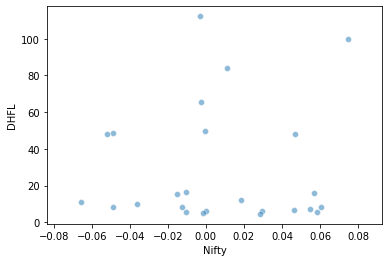

In [46]:
X1 = X1[:,1]
sns.scatterplot(x = 'Perc_change_Nifty',y = 'Perc_change_DHFL' , data = df_c1, alpha = 0.5)
plt.xlabel('Nifty')
plt.ylabel('DHFL')

## Beta tells us how the stocks will react with respect to the market. Generally Beta is equal to 1.
## For example if Beta = 2 and the market increases by 10% then our stocks will increase by 20% and if market decreases by 10% then our stocks will decrease by 20%.
## Beta can be negative. If beta is negative then our stocks will react in an inversely proportional fashion. For example  if Beta = -1 and the market increases by 10% then our stocks will decrease by 10% and if market decreases by 10% then our stocks will increase by 10%.